In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.preprocessing.image import img_to_array

In [3]:
data='/home/piyush/Downloads/archive/plantvillage/PlantVillage'
diseases = os.listdir(data)

In [4]:
diseases

['Potato___healthy',
 'Tomato__Target_Spot',
 'Pepper__bell___Bacterial_spot',
 'Potato___Late_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Potato___Early_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Pepper__bell___healthy']

In [5]:
#separating plant names and disease names
'''plant=[]
condition=[]
for i in diseases:
    plant.append((i.split('___'))[0])
    condition.append((i.split('___'))[1])'''

"plant=[]\ncondition=[]\nfor i in diseases:\n    plant.append((i.split('___'))[0])\n    condition.append((i.split('___'))[1])"

In [6]:
#plant

In [7]:
#condition

In [8]:
#removing duplicates
#plant=list(dict.fromkeys(plant))
#condition=list(dict.fromkeys(condition))

In [9]:
#plant

In [10]:
#condition

In [11]:
import pathlib
data_dir=pathlib.Path(data)
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Tomato_Late_blight/0172b2ff-6f6f-43e1-9a63-ea4bb2bce450___GHLB_PS Leaf 17 Day 9.jpg'),
 PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Tomato_Late_blight/4be2e7c4-f539-41c3-975b-a1ff17b516ec___GHLB_PS Leaf 2 Day 8.jpg'),
 PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Tomato_Late_blight/bff1cbac-a141-4eda-ab29-b34dee705bce___GHLB_PS Leaf 47 Day 18.jpg'),
 PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Tomato_Late_blight/231e8502-72a3-4717-9ab7-919d02f6be1b___GHLB_PS Leaf 27.4 Day 13.jpg'),
 PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Tomato_Late_blight/ea42a7f6-5683-41d6-b3fc-acf07d1865e4___GHLB_PS Leaf 8 Day 9.jpg')]

In [12]:
dic={}
for i in diseases:
    dic[i]=list(data_dir.glob(i+'/*'))
dic

{'Potato___healthy': [PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/23f1ab77-d664-49c4-92eb-41eb66c6d101___RS_HL 4169.JPG'),
  PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/9b5be0c5-7d7e-493d-88ba-c721c85f73ca___RS_HL 5405.JPG'),
  PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/b0fe9fe9-52e7-40e4-b4c0-769f1a0c7fb9___RS_HL 4175.JPG'),
  PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/2ccb9ee9-faac-4d32-9af5-29497fa2e028___RS_HL 1837.JPG'),
  PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/849aa978-c7b9-4344-9ca8-129219a65f8e___RS_HL 1874.JPG'),
  PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/1106c3fc-92cb-41a6-a6c6-8f08b9b45108___RS_HL 1914.JPG'),
  PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/3a00204c-5e53-4e5d-95a6-f8819

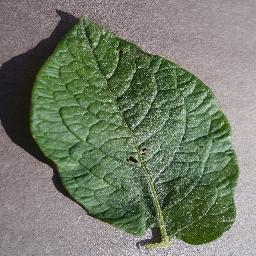

In [13]:
PIL.Image.open(str(list(data_dir.glob('Potato___healthy/*'))[1]))

In [14]:
k=int(0)
labels={}
for i in diseases:
    labels[i]=k
    k=k+1
print(labels)

{'Potato___healthy': 0, 'Tomato__Target_Spot': 1, 'Pepper__bell___Bacterial_spot': 2, 'Potato___Late_blight': 3, 'Tomato_Spider_mites_Two_spotted_spider_mite': 4, 'Potato___Early_blight': 5, 'Tomato_Bacterial_spot': 6, 'Tomato_Leaf_Mold': 7, 'Tomato_Early_blight': 8, 'Tomato_Late_blight': 9, 'Tomato__Tomato_mosaic_virus': 10, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 11, 'Tomato_Septoria_leaf_spot': 12, 'Tomato_healthy': 13, 'Pepper__bell___healthy': 14}


In [15]:
#PIL.Image.open(str(list(data_dir.glob('Tomato___Late_blight/*'))[0]))
dic['Potato___healthy'][:5]

[PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/23f1ab77-d664-49c4-92eb-41eb66c6d101___RS_HL 4169.JPG'),
 PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/9b5be0c5-7d7e-493d-88ba-c721c85f73ca___RS_HL 5405.JPG'),
 PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/b0fe9fe9-52e7-40e4-b4c0-769f1a0c7fb9___RS_HL 4175.JPG'),
 PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/2ccb9ee9-faac-4d32-9af5-29497fa2e028___RS_HL 1837.JPG'),
 PosixPath('/home/piyush/Downloads/archive/plantvillage/PlantVillage/Potato___healthy/849aa978-c7b9-4344-9ca8-129219a65f8e___RS_HL 1874.JPG')]

In [44]:
import cv2

dtype('uint8')

In [ ]:
X, y = [], []
for name, images in dic.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is None:#If the image data is empty, skip
           continue
        else:
            img=img.astype(np.float32)
            resized_img = cv2.resize(img,(180,180))
            X.append(resized_img)
            y.append(labels[name])

In [ ]:
X, y = [], []
from tensorflow.keras.preprocessing.image import load_img
import warnings
from tensorflow.keras.preprocessing.image import img_to_array
for name, images in dic.items():
    for image in images:
        img=load_img(str(image))
        img_numpy_array = img_to_array(img)
        if img_numpy_array != 0:
            X.append(img_numpy_array)
            y.append(labels[name])

In [ ]:
X1=np.array(X)
y1=np.array(y)

In [ ]:
#print(X_train.shape, X_train.dtype)
x.dtype

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
num=15
model=keras.Sequential([
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='softmax'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num),
])

In [57]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=30)

Epoch 1/30


TypeError: in user code:

    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:394 call
        outputs = layer(inputs, **kwargs)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/keras/layers/convolutional.py:249 call
        outputs = self._convolution_op(inputs, self.kernel)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:1012 convolution_v2
        return convolution_internal(
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:1142 convolution_internal
        return op(
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:2596 _conv2d_expanded_batch
        return gen_nn_ops.conv2d(
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/ops/gen_nn_ops.py:969 conv2d
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:628 _apply_op_helper
        _SatisfiesTypeConstraint(base_type,
    /home/piyush/.local/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:59 _SatisfiesTypeConstraint
        raise TypeError(

    TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32


In [ ]:
data1='../input/new-plant-diseases-dataset/test'
test_data=data1+'/test'
test_data = os.listdir(test_data)
test_data

In [ ]:
#../input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG
x_test=[]
dire='../input/new-plant-diseases-dataset/test/test/'
for i in test_data:
    string=dire+i
    img=cv2.imread(os.path.abspath(string))
    resize=cv2.resize(img,(180,180))
    x_test.append(resize)

In [ ]:
x_test[0]

In [ ]:
x_test=np.array(x_test)/255

In [ ]:
predicts=model.predict(x_test)
predicts[1]

In [ ]:
np.argmax(predicts[1])